In [1]:
import time

import matplotlib.pyplot as plt 
import numpy as np

import mnist_loader
import network
import network2
import random
import sys 

from matplotlib import cm

In [2]:
model_name = 'mnist_model.npy'
model2_name = 'mnist_model_2.json'

In [57]:
evaluation_cost, evaluation_accuracy, training_cost, \
training_accuracy = [], [], [], []

def main2(action):
    global evaluation_cost
    global evaluation_accuracy
    global training_cost
    global training_accuracy
    if action == 'train':
        epochs = 50
        training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
        start = time.time()
        net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
        (evaluation_cost, evaluation_accuracy, training_cost,
        training_accuracy) = net.SGD(training_data, epochs, 10, 0.5,
                lmbda=5.0,
                evaluation_data=validation_data,
                monitor_evaluation_accuracy=True,
                monitor_evaluation_cost=True,
                monitor_training_accuracy=True,
                monitor_training_cost=True)
        print(training_accuracy)
        end = time.time()
        net.save(model2_name)
        print(f'train time taken: {round(end-start, 2)} s')
    elif action == 'test':
        net = network2.load(model2_name)
        index = random.randint(0, 1000)
        training_data, validation_data, test_data \
              = mnist_loader.load_data_wrapper()
        test_data = list(test_data)
        test_img = test_data[index][0].reshape((28, 28))
        plt.imshow(test_img, cmap=cm.Greys_r)
#         plt.savefig('infer-2.png')
        test_img_mat = test_data[index][0].reshape((784, 1))


        print(f'info: running inference on img index: {index}')
        res = net.feedforward(test_img_mat)
        print(f'res: {res}')
        out = np.argmax(res)
        print(f'out: {out}')


In [58]:
main2('train')
print("done.")

info: Epoch 0 training complete
info: Cost on training data: 0.45913332423236547
info: Accuracy on training data: 47232 / 50000
info: Cost on evaluation data: 0.7632441438156978
info: Accuracy on evaluation data: 9488 / 10000
info: Epoch 1 training complete
info: Cost on training data: 0.4545769118096483
info: Accuracy on training data: 47489 / 50000
info: Cost on evaluation data: 0.8707513550855002
info: Accuracy on evaluation data: 9471 / 10000
info: Epoch 2 training complete
info: Cost on training data: 0.4424731277469542
info: Accuracy on training data: 47613 / 50000
info: Cost on evaluation data: 0.900662547160842
info: Accuracy on evaluation data: 9482 / 10000
info: Epoch 3 training complete
info: Cost on training data: 0.40583210310009366
info: Accuracy on training data: 47932 / 50000
info: Cost on evaluation data: 0.9016153403270476
info: Accuracy on evaluation data: 9533 / 10000
info: Epoch 4 training complete
info: Cost on training data: 0.4567390609533388
info: Accuracy on t

info: Accuracy on training data: 48380 / 50000
info: Cost on evaluation data: 0.9668059686472179
info: Accuracy on evaluation data: 9576 / 10000
info: Epoch 37 training complete
info: Cost on training data: 0.3687009185797159
info: Accuracy on training data: 48530 / 50000
info: Cost on evaluation data: 0.9472817040416757
info: Accuracy on evaluation data: 9606 / 10000
info: Epoch 38 training complete
info: Cost on training data: 0.3695845255865503
info: Accuracy on training data: 48481 / 50000
info: Cost on evaluation data: 0.9547561016397863
info: Accuracy on evaluation data: 9609 / 10000
info: Epoch 39 training complete
info: Cost on training data: 0.3599927330988415
info: Accuracy on training data: 48530 / 50000
info: Cost on evaluation data: 0.9496903426475758
info: Accuracy on evaluation data: 9608 / 10000
info: Epoch 40 training complete
info: Cost on training data: 0.36063360405234834
info: Accuracy on training data: 48501 / 50000
info: Cost on evaluation data: 0.938519727775478

info: running inference on img index: 239
res: [[1.89115354e-05]
 [9.98473500e-01]
 [1.25418361e-04]
 [5.19610595e-04]
 [1.10036296e-04]
 [1.24011684e-03]
 [7.28461843e-03]
 [8.48301315e-04]
 [1.59734640e-02]
 [1.17741118e-03]]
out: 1


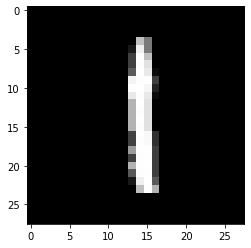

In [59]:
main2('test')

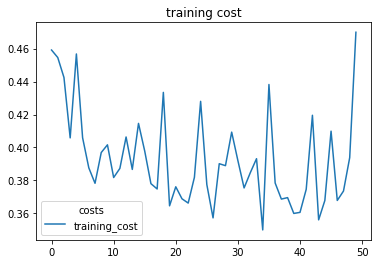

In [60]:
plt.plot(training_cost, label='training_cost')
plt.title('training cost')
plt.legend(title = 'costs')
plt.show()

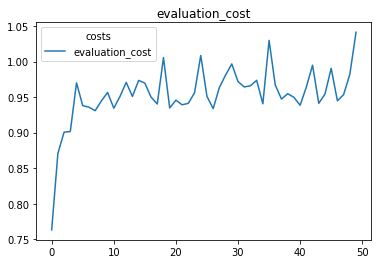

In [61]:
plt.plot(evaluation_cost, label='evaluation_cost')
plt.title('evaluation_cost')
plt.legend(title = 'costs')
plt.show()

In [72]:
perc = [xx * 100.0/50000 for xx in training_accuracy]
perc
# perc = training_accuracy * (1/50000)

[94.464,
 94.978,
 95.226,
 95.864,
 95.076,
 95.996,
 96.342,
 96.546,
 96.172,
 96.28,
 96.648,
 96.462,
 96.028,
 96.33,
 96.138,
 96.348,
 96.682,
 96.69,
 95.792,
 96.976,
 96.724,
 96.902,
 96.768,
 96.586,
 95.792,
 96.686,
 97.098,
 96.438,
 96.608,
 96.094,
 96.434,
 96.63,
 96.73,
 96.55,
 97.17,
 95.698,
 96.76,
 97.06,
 96.962,
 97.06,
 97.002,
 96.706,
 96.01,
 97.184,
 96.868,
 96.204,
 97.0,
 96.712,
 96.522,
 95.166]

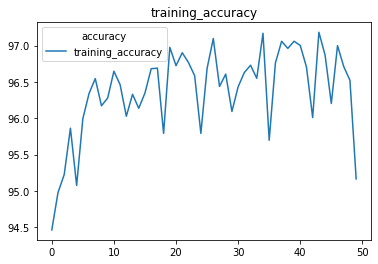

In [73]:
perc = [xx * 100.0/50000 for xx in training_accuracy]
plt.plot(perc, label='training_accuracy')
plt.title('training_accuracy')
plt.legend(title = 'accuracy')
plt.show()

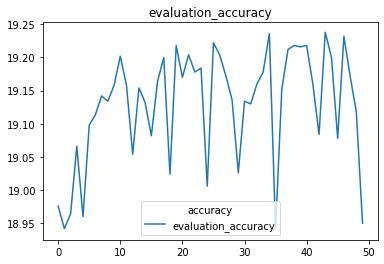

In [75]:
perc = [xx * 100.0/50000 for xx in evaluation_accuracy]
plt.plot(perc, label='evaluation_accuracy')
plt.title('evaluation_accuracy')
plt.legend(title = 'accuracy')
plt.show()